## Gemini BuildWithAI 2025 Workshop

<a target="_blank" href="https://colab.research.google.com/github/mashhoodr/gemini-cookbook/blob/main/workshops/gemini-vibecoding.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>


This notebook is designed to help you become familiar with Gemini's API while creating some simple projects. We use "vibe coding" to help build some basic apps and test out the power of Gemini.

### Learning Outcomes

The objective of this workshop is to help the attendees become familiar with the offerings of Google Gemini, and give them an opportunity to try out the API themselves. We run through a few exercises to help understand the use cases for the different functionalities present.

### Authentication

The Gemini API uses API keys for authentication. We will now setup the API key in this colab - and test out our authentication. Your trainer has already demoed the instructions below.

You can [create](https://aistudio.google.com/app/apikey) your API key using Google AI Studio with a single click.  

Remember to treat your API key like a password. Do not accidentally save it in a notebook or source file you later commit to GitHub. This notebook shows you two ways you can securely store your API key.

* If you are using Google Colab, we recommend you store your key in Colab Secrets.

* If you are using a different development environment (or calling the Gemini API through `cURL` in your terminal), we recommend you store your key in an environment variable.

Let's start with Colab Secrets.

Add your API key to the Colab Secrets manager to securely store it.

1. Open your Google Colab notebook and click on the 🔑 **Secrets** tab in the left panel.
   
   <img src="https://storage.googleapis.com/generativeai-downloads/images/secrets.jpg" alt="The Secrets tab is found on the left panel." width=50%>

2. Create a new secret with the name `GOOGLE_API_KEY`.
3. Copy/paste your API key into the `Value` input box of `GOOGLE_API_KEY`.
4. Toggle the button on the left to allow notebook access to the secret.


### Install the Python SDK

In [1]:
!pip install -q -U google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 5.9 MB/s eta 0:00:00


### Configure the SDK with your API key.

You'll call `genai.configure` with your API key, but instead of pasting your key into the notebook, you'll read it from Colab Secrets.

In [2]:
from google import genai
from google.genai import types
from google.colab import userdata
from pydantic import BaseModel
from IPython.display import Markdown, HTML, Image

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=GOOGLE_API_KEY)

And that's it! Now you're ready to use the Gemini API.

Now lets set our model we want to use throughout this notebook. You can change this to any available model.

In [3]:

MODEL = "gemini-2.5-flash"

### Running your first prompt

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to generate_content, and use the `.text` property to get the text content of the response.

In [5]:
response = client.models.generate_content(
    model=MODEL, contents="Explain how AI works in a few words."
)

print(response.text)

AI learns patterns from data to make predictions or decisions.


> *Do it yourself: Update the above using a different Gemini version available. Did the response change?*

#### Use images in your prompt

Here we download an image from a URL and pass that image in our prompt.

First, we download the image and load it with PIL:

In [6]:
!curl -o image.jpg https://storage.googleapis.com/generativeai-downloads/images/jetpack.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  349k  100  349k    0     0  3061k      0 --:--:-- --:--:-- --:--:-- 3090k


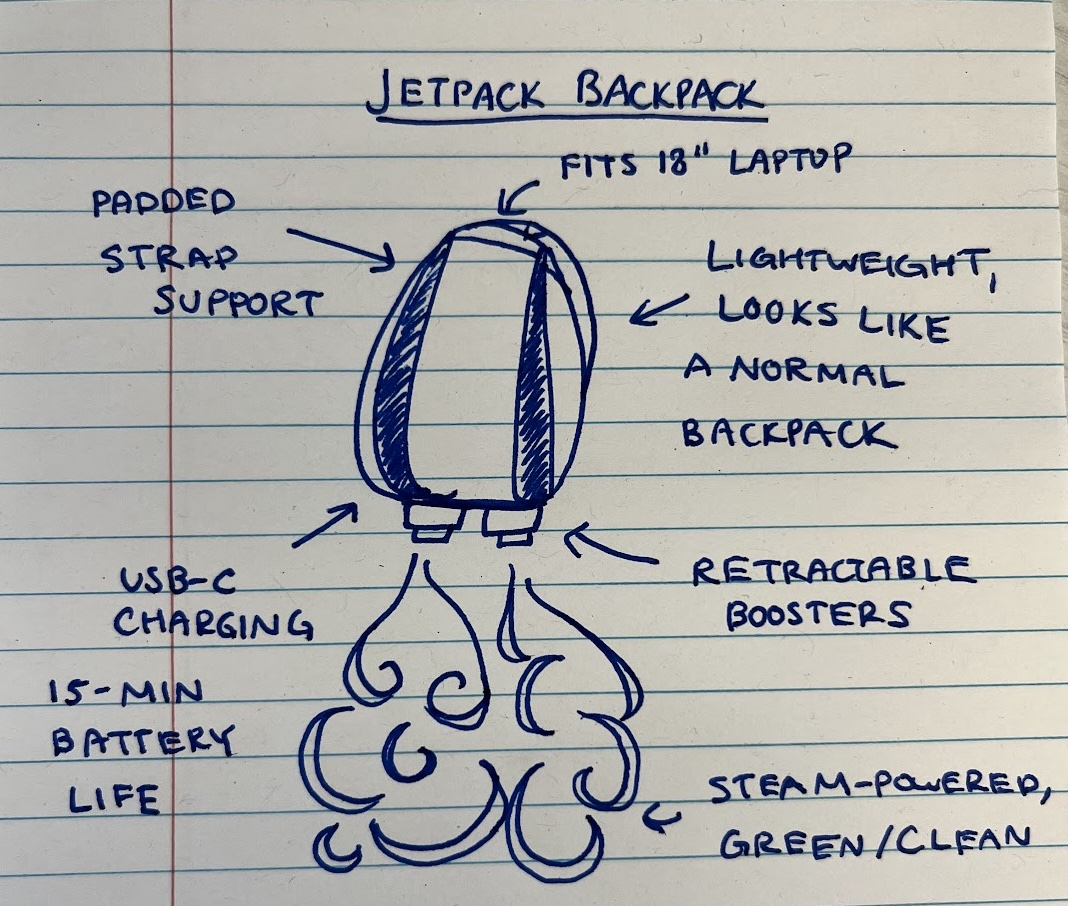

In [7]:
import PIL.Image
img = PIL.Image.open('image.jpg')
img

In [9]:
prompt = """This image contains a sketch of a potential product along with some notes.
Given the product sketch, describe the product as thoroughly as possible based on what you
see in the image, making sure to note all of the product features. Return output in json format:
{description: description, features: [feature1, feature2, feature3, etc]}"""

Then we can include the image in our prompt by just passing a list of items to `generate_content`. You can pass in multiple images, or prompts or files as per your requirement.

In [10]:
response = client.models.generate_content(
    model=MODEL,
    contents=[prompt, img]
)
print(response.text)

```json
{
  "description": "The \"Jetpack Backpack\" is a personal mobility device disguised as a conventional backpack. It is designed to be lightweight and visually indistinguishable from a normal backpack. Its propulsion system is steam-powered, emphasizing a green and clean energy source for flight. The device incorporates modern charging capabilities and provides a specific duration of aerial use.",
  "features": [
    "Padded strap support",
    "Capacity to fit an 18-inch laptop",
    "Lightweight design",
    "Discreet appearance (looks like a normal backpack)",
    "Retractable boosters",
    "USB-C charging",
    "15-minute battery life (for jetpack function)",
    "Steam-powered propulsion",
    "Green/clean operation"
  ]
}
```


#### Uploading files

For types other than image, like audio, video or pdf - you can use the `upload_file` function to send data to Gemini.

The following list of documents are supported:

- PDF - application/pdf
- JavaScript - application/x-javascript, text/javascript
- Python - application/x-python, text/x-python
- TXT - text/plain
- HTML - text/html
- CSS - text/css
- Markdown - text/md
- CSV - text/csv
- XML - text/xml
- RTF - text/rtf

First download a PDF file into Colab.

In [12]:
URL = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"
!wget -q $URL -O sample.pdf

Then pass it into Gemini.

In [13]:
import pathlib
import io
import httpx


your_file = client.files.upload(file='sample.pdf')
prompt = "Can you summarize this file as a bulleted list?"

response = client.models.generate_content(
  model=MODEL,
  contents=[your_file, prompt])

Markdown(response.text)

Here's a summary of the provided content in a bulleted list:

*   **Objective:** Introduces a method for smooth, parametric editing of material properties (such as color, shininess, or transparency) of objects within any photograph.
*   **Problem Addressed:** Existing photo editing tools often require expert skill for photorealistic material changes, and current generative text-to-image (T2I) models struggle to disentangle material properties from object shape, potentially altering geometry during edits.
*   **Methodology:**
    *   Leverages pre-trained T2I models (specifically Stable Diffusion 1.5).
    *   Fine-tunes these models using a *synthetic dataset*.
    *   The synthetic dataset is created by rendering 100 3D household objects, systematically varying single material attributes (roughness, metallic, albedo, transparency) across different "edit strengths" while keeping object shape, lighting, and camera angle constant.
    *   The trained model accepts an input image, a text instruction, and a scalar "edit strength" value to apply the desired material change.
*   **Key Innovations/Features:**
    *   Achieves photorealistic edits of material properties.
    *   Maintains the original object's geometric shape and lighting conditions.
    *   Generalizes effectively from the relatively small synthetic dataset to real-world images.
    *   Handles complex effects like background filling for transparency and caustic lighting.
*   **Results & Validation:**
    *   User studies showed the method produced more photorealistic edits (69.6% vs. 30.4%) and was strongly preferred (70.2% vs. 29.8%) compared to a baseline (InstructPix2Pix).
*   **Applications:**
    *   Facilitates visualization for interior design (e.g., repainting rooms).
    *   Enables artists, architects, and designers to easily mock up new product designs.
    *   Demonstrates 3D consistent edits when combined with NeRF (Neural Radiance Fields) for synthesizing new views of edited scenes.
*   **Research Paper:** The technique is detailed in "Alchemist: Parametric Control of Material Properties with Diffusion Models," published at CVPR 2024.

#### Supply a schema through model configuration
The following example does the following:

Instantiates a model configured through a schema to respond with JSON.
Prompts the model to return cookie recipes.

The Gemini API Python client library supports schemas defined with the following types (where AllowedType is any allowed type):

- string -> enum, format, nullable
- integer -> format, minimum, maximum, enum, nullable
- number -> format, minimum, maximum, enum, nullable
- boolean -> nullable
- array -> minItems, maxItems, items, nullable
- object -> properties, required, propertyOrdering, nullable

In [11]:

class Recipe(BaseModel):
  recipe_name: str
  ingredients: list[str]

response = client.models.generate_content(
    model=MODEL,
    contents='List a few popular cookie recipes.',
    config={
        'response_mime_type': 'application/json',
        'response_schema': list[Recipe],
    },
)

# Use the response as a JSON string.
print(response.text)

# Use instantiated objects.
my_recipes: list[Recipe] = response.parsed

[
  {
    "recipe_name": "Chocolate Chip Cookies",
    "ingredients": ["All-purpose flour", "Baking soda", "Salt", "Unsalted butter", "Granulated sugar", "Brown sugar", "Eggs", "Vanilla extract", "Chocolate chips"]
  },
  {
    "recipe_name": "Peanut Butter Cookies",
    "ingredients": ["All-purpose flour", "Baking soda", "Salt", "Unsalted butter", "Creamy peanut butter", "Granulated sugar", "Brown sugar", "Eggs", "Vanilla extract"]
  },
  {
    "recipe_name": "Oatmeal Raisin Cookies",
    "ingredients": ["All-purpose flour", "Baking soda", "Cinnamon", "Salt", "Unsalted butter", "Granulated sugar", "Brown sugar", "Eggs", "Vanilla extract", "Rolled oats", "Raisins"]
  }
]


#### Use an enum to constrain output
In some cases you might want the model to choose a single option from a list of options. To implement this behavior, you can pass an enum in your schema. You can use an enum option anywhere you could use a str in the response_schema, because an enum is a list of strings. Like a JSON schema, an enum lets you constrain model output to meet the requirements of your application.

For example, assume that you're developing an application to classify musical instruments into one of five categories: "Percussion", "String", "Woodwind", "Brass", or ""Keyboard"". You could create an enum to help with this task.

In [15]:
import enum

class Instrument(enum.Enum):
  PERCUSSION = "Percussion"
  STRING = "String"
  WOODWIND = "Woodwind"
  BRASS = "Brass"
  KEYBOARD = "Keyboard"

response = client.models.generate_content(
    model=MODEL,
    contents='What type of instrument is an oboe?',
    config={
        'response_mime_type': 'text/x.enum',
        'response_schema': Instrument,
    },
)

print(response.text)

 Woodwind


#### Have a chat

The Gemini API enables you to have freeform conversations across multiple turns.

The [ChatSession](https://ai.google.dev/api/python/google/generativeai/ChatSession) class will store the conversation history for multi-turn interactions.

In [16]:
chat = client.chats.create(model=MODEL)
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
print(response.text)

A computer is a super-fast helper that does exactly what you tell it to do, like play games or show videos.


You can see the chat history:

In [17]:
for message in chat.get_history():
    print(f'role - {message.role}',end=": ")
    print(message.parts[0].text)

role - user: In one sentence, explain how a computer works to a young child.
role - model: A computer is a super-fast helper that does exactly what you tell it to do, like play games or show videos.


You can send another message to continue the conversation. The previous conversation is automatically sent in the next message as context.

In [18]:
response = chat.send_message("What are the main components of a computer?")
print(response.text)

The main components of a computer are:

1.  **Central Processing Unit (CPU):** The "brain" of the computer, performing all the calculations and executing instructions.
2.  **Random Access Memory (RAM):** The computer's short-term memory, used for actively running programs and data.
3.  **Storage (Hard Drive or Solid State Drive - HDD/SSD):** Where the computer permanently saves all your files, programs, and the operating system.
4.  **Motherboard:** The main circuit board that connects all the other components together, allowing them to communicate.
5.  **Graphics Processing Unit (GPU) / Video Card:** Processes and outputs images and video to your display (sometimes integrated into the CPU).
6.  **Power Supply Unit (PSU):** Converts electricity from the wall outlet into power that the computer's components can use.
7.  **Monitor (Display):** Shows you what the computer is doing.
8.  **Keyboard & Mouse:** Allow you to input commands and interact with the computer.


### Setting the system instruction

The system instruction in Gemini is a tool for developers to fine-tune the model's responses for specific tasks. It lets them define various aspects of how Gemini should generate responses [2].

Here are some key benefits of system instructions:

**Role definition:** You can specify the role Gemini should play, such as a home-cooking assistant or a music historian.

**Format control:** Instruct Gemini on the format of the response, like text, a list, or even a structured JSON object.

**Goal setting:** Clearly define the goal you want Gemini to achieve, making the response more focused and relevant.

**Rule establishment:** Set rules for Gemini to follow, ensuring the response adheres to your specific requirements.

In [19]:
response = client.models.generate_content(
    model=MODEL,
    contents=["Share a short story for children on kindness."],
    config=types.GenerateContentConfig(
        max_output_tokens=500,
        temperature=0.1,
        system_instruction="You are a primary school teacher specializing in early childhood education. Use positive reinforcement and interactive methods to teach basic concepts. Adapt your responses to the learning style of a young child."
    )
)
print(response.text)


None


## Let's do some practice!

Follow the instructions for the excercise below and add your code in the section after. You can use AI Studio or Gemini app to generate most of the code for the exercises below.

### Exercise 1: A Simple Story Generator with Gemini Chat API

**Problem statement**

When kids are learning how to read - for every kid its a very difficult and slow process. The only way to get better is practice. However the practice needs to be at the right level, simply reading the same book a thousand times isnt good enough.

Enter our story generator.
1. It can be designed to generate content at the right level, so for example grade one.
2. It can generate new content every time
3. It can generate content which appeals to the child, where they are the hero (check link below).

The right product will help the kids learn to read better over time.

**Theme Selection**

Present a list of themes (e.g., fantasy, sci-fi, mystery, historical) when the session starts.
Allow the user to input a theme or select from the list.

**Initial Story Generation**

Based on the selected theme, generate a short paragraph introducing the story and the user's character. Ensure its safe for children, uses easy to use language and as creative as possible.

**Action Selection**

Provide multiple action choices related to the current story.
Allow the user to select an action.

**Story Continuation**

Generate a new paragraph based on the user's chosen action, advancing the story.
Repeat steps 3 and 4 until a desired story length or ending condition is reached.

Idea is inspired by https://www.wander.ly/ - check their website for more inspiration.

**Execution Plan**

Think about generating a short story first, what elements from above do you need to configure.
Use the schemas from above.
Think about the constraints - what should it generate, and what shouldnt it generate.
Use the input function to take relevant inputs from the user.
Configure it to generate some actions for the next generation.
Present those actions for selection
Generate the next part until the user says stop.

In [21]:
import random

def choose_theme():
    themes = ["Fantasy", "Sci-Fi", "Mystery"]
    print("Choose a theme:")
    for i, theme in enumerate(themes):
        print(f"{i+1}. {theme}")
    while True:
        try:
            choice = int(input("Enter number: "))
            if 1 <= choice <= len(themes):
                return themes[choice - 1]
        except ValueError:
            pass
        print("Please enter a valid number.")

def get_intro(name, theme):
    return {
        "Fantasy": f"{name} saw a door glowing in the forest.",
        "Sci-Fi": f"{name} woke up in a robot lab.",
        "Mystery": f"{name} found a dusty note under the bed."
    }[theme]

def get_actions(theme):
    return {
        "Fantasy": ["Open the glowing door", "Follow the fireflies", "Climb the magic tree"],
        "Sci-Fi": ["Press the green button", "Talk to the robot", "Enter the shiny pod"],
        "Mystery": ["Read the note", "Peek through the window", "Open the creaky box"]
    }[theme]

def continue_story(name, action):
    events = [
        f"{name} decided to {action.lower()} and discovered something strange!",
        f"After {action.lower()}, a secret passage opened.",
        f"{action} led {name} to a hidden treasure!",
        f"Suddenly, a whisper said: 'Well done, {name}...'",
        f"{name} {action.lower()} and made a new friend!"
    ]
    return random.choice(events)

# Main Program
print("Welcome to the Infinite Story Generator!")
name = input("What's your name? ") or "You"
theme = choose_theme()

print("\nYour story begins:")
print(get_intro(name, theme))

# Infinite loop
while True:
    actions = get_actions(theme)
    print("\nWhat will you do? (type 'exit' to end)")
    for i, act in enumerate(actions):
        print(f"{i+1}. {act}")

    choice = input("Choose an action or 'exit': ").strip().lower()

    if choice == "exit":
        print(f"\nThanks for playing, {name}! Come back for more adventures soon.")
        break

    if choice.isdigit():
        choice_num = int(choice)
        if 1 <= choice_num <= len(actions):
            action = actions[choice_num - 1]
            print(continue_story(name, action))
        else:
            print("Invalid number. Try again.")
    else:
        print("Please enter a number or type 'exit'.")


Welcome to the Infinite Story Generator!
What's your name? Zainab cutie
Choose a theme:
1. Fantasy
2. Sci-Fi
3. Mystery
Enter number: 1

Your story begins:
Zainab cutie saw a door glowing in the forest.

What will you do? (type 'exit' to end)
1. Open the glowing door
2. Follow the fireflies
3. Climb the magic tree
Choose an action or 'exit': 2
Follow the fireflies led Zainab cutie to a hidden treasure!

What will you do? (type 'exit' to end)
1. Open the glowing door
2. Follow the fireflies
3. Climb the magic tree
Choose an action or 'exit': 3
Zainab cutie climb the magic tree and made a new friend!

What will you do? (type 'exit' to end)
1. Open the glowing door
2. Follow the fireflies
3. Climb the magic tree
Choose an action or 'exit': exit

Thanks for playing, Zainab cutie! Come back for more adventures soon.


#### Let's continue to dive deeper with Function calling

To use function calling, pass a list of functions to the `tools` parameter when creating a [`GenerativeModel`](https://ai.google.dev/api/python/google/generativeai/GenerativeModel). The model uses the function name, docstring, parameters, and parameter type annotations to decide if it needs the function to best answer a prompt.

> Important: The SDK converts function parameter type annotations to a format the API understands (`glm.FunctionDeclaration`). The API only supports a limited selection of parameter types, and the Python SDK's automatic conversion only supports a subset of that: `AllowedTypes = int | float | bool | str | list['AllowedTypes'] | dict`

In [24]:
def add(a:float, b:float):
    """returns a + b."""
    return a+b

def subtract(a:float, b:float):
    """returns a - b."""
    return a-b

def multiply(a:float, b:float):
    """returns a * b."""
    return a*b

def divide(a:float, b:float):
    """returns a / b."""
    return a/b


config = {
    "tools": [add, subtract, multiply, divide],
}
chat = client.chats.create(model=MODEL, config=config)
response = chat.send_message('I have 57 cats, each owns 44 kittens, how many kittens is that in total?')
response = chat.send_message('I have 34 hours in a day, and i sleep 67 hours')
response.text

"That's not possible. There are only 24 hours in a day. It sounds like there might be a misunderstanding or a typo in your numbers. Can you please clarify what you mean?"

However, by examining the chat history, you can see the flow of the conversation and how function calls are integrated within it.

The `ChatSession.history` property stores a chronological record of the conversation between the user and the Gemini model. Each turn in the conversation is represented by a [`glm.Content`](https://ai.google.dev/api/python/google/ai/generativelanguage/Content) object, which contains the following information:

*   **Role**: Identifies whether the content originated from the "user" or the "model".
*   **Parts**: A list of [`glm.Part`](https://ai.google.dev/api/python/google/ai/generativelanguage/Part) objects that represent individual components of the message. With a text-only model, these parts can be:
    *   **Text**: Plain text messages.
    *   **Function Call** ([`glm.FunctionCall`](https://ai.google.dev/api/python/google/ai/generativelanguage/FunctionCall)): A request from the model to execute a specific function with provided arguments.
    *   **Function Response** ([`glm.FunctionResponse`](https://ai.google.dev/api/python/google/ai/generativelanguage/FunctionResponse)): The result returned by the user after executing the requested function.

 In the previous example with the mittens calculation, the history shows the following sequence:

1.  **User**: Asks the question about the total number of mittens.
1.  **Model**: Determines that the multiply function is helpful and sends a FunctionCall request to the user.
1.  **User**: The `ChatSession` automatically executes the function (due to `enable_automatic_function_calling` being set) and sends back a `FunctionResponse` with the calculated result.
1.  **Model**: Uses the function's output to formulate the final answer and presents it as a text response.

In [ ]:
for content in chat.get_history():
    print(content.role, "->", [(str(part.function_call) + ' -> ' + str(part.function_response)) for part in content.parts])
    print('-'*80)

#### Use Model Context Protocol (MCP)

Model Context Protocol (MCP) is an open standard to connect AI applications with external tools, data sources, and systems. MCP provides a common protocol for models to access context, such as functions (tools), data sources (resources), or predefined prompts. You can use models with MCP server using their tool calling capabilities.

MCP servers expose the tools as JSON schema definitions, which can be used with Gemini compatible function declarations. This lets you to use a MCP server with Gemini models directly. You can learn more about MCP and how to use it in the documentation:

https://ai.google.dev/gemini-api/docs/function-calling?example=weather#model_context_protocol_mcp


### Exercise 2: A Weather App using Function Calling.

Create a simple weather app using Python which will use function calling to fetch the latest weather when asked about for a specific location.

An example prompt for it can be: `Whats the weather like in Islamabad today?`

You can use the free api available on: https://www.weatherapi.com/

Bonus: Configure the temperature setting as well (C or F), with C being default.

When you ask for `Hows the weather in Karachi this week?` is it able to adjust the output accordingly?

What happens when you ask it a question like `Do I need an umbrella in Islamabad today?`

In [27]:
import requests

# Replace this with your actual WeatherAPI key
API_KEY = "141e946c834b4a0186f112749251207"

def get_weather(city, forecast=False, unit="C"):
    base_url = "http://api.weatherapi.com/v1/"
    endpoint = "forecast.json" if forecast else "current.json"
    url = f"{base_url}{endpoint}?key={API_KEY}&q={city}&days=7&aqi=no&alerts=no"

    try:
        response = requests.get(url)
        data = response.json()

        if "error" in data:
            return f"Error: {data['error']['message']}"

        if forecast:
            forecast_days = data['forecast']['forecastday']
            output = [f"\nWeather forecast for {city.title()}:\n"]
            for day in forecast_days:
                date = day['date']
                condition = day['day']['condition']['text']
                temp = day['day']['avgtemp_c'] if unit == "C" else day['day']['avgtemp_f']
                rain_chance = day['day']['daily_chance_of_rain']
                output.append(f"{date}: {condition}, Temp: {temp}°{unit}, Rain: {rain_chance}%")
            return "\n".join(output)
        else:
            condition = data['current']['condition']['text']
            temp = data['current']['temp_c'] if unit == "C" else data['current']['temp_f']
            return f"\nCurrent weather in {city.title()}: {condition}, Temp: {temp}°{unit}"

    except Exception as e:
        return f"Failed to get weather data: {str(e)}"

def should_take_umbrella(city):
    url = f"http://api.weatherapi.com/v1/forecast.json?key={API_KEY}&q={city}&days=1&aqi=no&alerts=no"
    try:
        response = requests.get(url)
        data = response.json()
        rain_chance = data['forecast']['forecastday'][0]['day']['daily_chance_of_rain']
        if int(rain_chance) > 50:
            return f"\nYes, bring an umbrella to {city.title()} today. Rain chance: {rain_chance}%."
        else:
            return f"\nNo umbrella needed in {city.title()} today. Rain chance: {rain_chance}%."
    except Exception as e:
        return f"Failed to get umbrella advice: {str(e)}"

def handle_query(query):
    query = query.lower()
    unit = "F" if "fahrenheit" in query or " f" in query else "C"

    if "umbrella" in query:
        city = query.split("in")[-1].replace("today", "").strip()
        return should_take_umbrella(city)

    if "week" in query or "forecast" in query:
        city = query.split("in")[-1].replace("this week", "").strip()
        return get_weather(city, forecast=True, unit=unit)

    if "weather" in query or "temperature" in query:
        city = query.split("in")[-1].replace("today", "").strip()
        return get_weather(city, forecast=False, unit=unit)

    return "\nSorry, I couldn't understand your question."

# Example queries to demonstrate
example_queries = [
    "What's the weather like in Islamabad today?",
    "How's the weather in Karachi this week?",
    "Do I need an umbrella in Lahore today?",
    "What’s the temperature in Quetta in Fahrenheit?"
]

for q in example_queries:
    print(f"\nUser asked: {q}")
    result = handle_query(q)
    print(result)



User asked: What's the weather like in Islamabad today?

Current weather in Islamabad ?: Sunny, Temp: 34.6°C

User asked: How's the weather in Karachi this week?

Weather forecast for Karachi ?:

2025-07-12: Partly Cloudy , Temp: 29.9°C, Rain: 0%
2025-07-13: Patchy rain nearby, Temp: 29.1°C, Rain: 89%
2025-07-14: Patchy rain nearby, Temp: 29.4°C, Rain: 89%
2025-07-15: Patchy rain nearby, Temp: 29.3°C, Rain: 88%
2025-07-16: Patchy rain nearby, Temp: 29.5°C, Rain: 89%
2025-07-17: Patchy rain nearby, Temp: 28.9°C, Rain: 85%
2025-07-18: Patchy rain nearby, Temp: 29.1°C, Rain: 0%

User asked: Do I need an umbrella in Lahore today?

Yes, bring an umbrella to Lahore ? today. Rain chance: 83%.

User asked: What’s the temperature in Quetta in Fahrenheit?
Error: No matching location found.


### Using Code Execution

The Gemini API code execution feature enables the model to generate and run Python code and learn iteratively from the results until it arrives at a final output. You can use this code execution capability to build applications that benefit from code-based reasoning and that produce text output. For example, you could use code execution in an application that solves equations or processes text.

The code execution environment includes the following libraries: altair, chess, cv2, matplotlib, mpmath, numpy, pandas, pdfminer, reportlab, seaborn, sklearn, statsmodels, striprtf, sympy, and tabulate. You can't install your own libraries.

In [28]:
response = client.models.generate_content(
  model=MODEL,
  contents='What is the sum of the first 50 prime numbers? '
           'Generate and run code for the calculation, and make sure you get all 50.',
  config=types.GenerateContentConfig(
    tools=[types.Tool(
      code_execution=types.ToolCodeExecution
    )]
  )
)

def display_code_execution_result(response):
  for part in response.candidates[0].content.parts:
    if part.text is not None:
      display(Markdown(part.text))
    if part.executable_code is not None:
      code_html = f'<pre style="background-color: #BBBBEE;">{part.executable_code.code}</pre>' # Change code color
      display(HTML(code_html))
    if part.code_execution_result is not None:
      display(Markdown(part.code_execution_result.output))
    if part.inline_data is not None:
      display(Image(data=part.inline_data.data, format="png"))
    display(Markdown("---"))

display_code_execution_result(response)

To find the sum of the first 50 prime numbers, I will generate the prime numbers one by one until I have 50 of them, and then sum them up using Python.

Here's the plan:
1.  Define a function to check if a number is prime.
2.  Iterate through numbers, checking for primality, and add primes to a list until 50 primes are collected.
3.  Calculate the sum of the numbers in the list.



---

---

The first 50 prime numbers are: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229]
The sum of the first 50 prime numbers is: 5117


---

The first 50 prime numbers are:
2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229.

The sum of these first 50 prime numbers is **5117**.

---

#### Prompt Caching

One of the cool new features which has been added by Gemini is prompt caching. If a part of your prompt or instructions is not changing, you can save some tokens by caching that part of the prompt. This is very useful in production where the same prompt might be used for thousands and millions of times and allows us to optimize cost.

In order to use the cache, we create a cache context and then call the generate content endpoint with the additional context.

First we download some data which is reused again and again across context.

In [29]:
!wget -q https://storage.googleapis.com/generativeai-downloads/data/a11.txt
!head a11.txt

INTRODUCTION

This is the transcription of the Technical Air-to-Ground Voice Transmission (GOSS NET 1) from the Apollo 11 mission.

Communicators in the text may be identified according to the following list.

Spacecraft:
CDR	Commander	Neil A. Armstrong
CMP	Command module pilot   	Michael Collins
LMP	Lunar module pilot	Edwin E. ALdrin, Jr.


In [30]:
import datetime

# upload the files.
document = client.files.upload(file="a11.txt")

cache_model='models/gemini-2.0-flash-001'

# Create a cache with a 5 minute TTL
cache = client.caches.create(
    model=cache_model,
    config=types.CreateCachedContentConfig(
      display_name='transcript',
      system_instruction=(
          "You are an expert at analyzing transcripts."
      ),
      contents=[document],
      ttl="300s",
  )
)

# Construct a GenerativeModel which uses the created cache.
response = client.models.generate_content(
  model = cache_model,
  contents= ("Find a lighthearted moment from this transcript"),
  config=types.GenerateContentConfig(cached_content=cache.name)
)


print(response.text)


print(response.usage_metadata)

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'TotalCachedContentStorageTokensPerModelFreeTier limit exceeded for model gemini-2.0-flash: limit=0, requested=322698', 'status': 'RESOURCE_EXHAUSTED'}}

In [ ]:
# Once you have used the cache you can also delete it (or it expires automatically at the given time)
client.caches.delete(name=cache.name)

#### URL Context

This is the latest functionality just dropped into the SDK, which allows you to provide Gemini with URLs as additional context for your prompt. The model can then retrieve content from the URLs and use that content to inform and shape its response.

This tool is useful for tasks like the following:

- Extracting key data points or talking points from articles
- Comparing information across multiple links
- Synthesizing data from several sources
- Answering questions based on the content of a specific page or pages
- Analyzing content for specific purposes (like writing a job description or creating test questions)

In [31]:
model_id = "gemini-2.5-flash-preview-05-20"

url_context_tool = types.Tool(
    url_context = types.UrlContext
)

response = client.models.generate_content(
    model=model_id,
    contents="Compare recipes from https://www.indianhealthyrecipes.com/chicken-biryani-recipe/ and https://www.teaforturmeric.com/chicken-biryani/",
    config=types.GenerateContentConfig(
        tools=[url_context_tool],
        response_modalities=["TEXT"],
    )
)

for each in response.candidates[0].content.parts:
    print(each.text)
# get URLs retrieved for context
print(response.candidates[0].url_context_metadata)

Both Indian Healthy Recipes and Tea for Turmeric provide comprehensive guides for making chicken biryani, though they offer slightly different approaches and ingredient preferences.

**Recipe Methods:**
*   **Indian Healthy Recipes** offers two distinct methods: a "one-pot" biryani that can be made in a pressure cooker or regular pot where marinated meat is cooked first, and then uncooked rice is layered and cooked with hot water; and a "restaurant-style" or "pakki dum biryani," which involves cooking the chicken gravy separately, par-cooking the rice, and then layering them for dum (steam) cooking.
*   **Tea for Turmeric** focuses on a method similar to the "pakki dum biryani," where the chicken curry is prepared, rice is parboiled, and then both are layered for final steaming. This recipe also provides an oven steaming method as an alternative.

**Key Ingredients and Flavor Profiles:**
*   **Biryani Masala:** Both recipes emphasize the importance of good quality spices. Both provide 

### Exercise 3: An Assessment Generator for School Teachers.

This is a slightly more complex one, we definitely dont want to single shot this app. I have listed down some prompts/requirements below - you can use these to build up the app step by step. You can choose to change these prompts or add any other functionality you like as well. We want to be able to "teach at right level" and think about creating a mixture of seen and unseen questions. We can use the PDF link to understand the scope and extract some relevant questions from there.

As you build up the functionality, think about testing this app, and how you will ensure that nothing is breaking after each iteration.

1. Download the Grade 4 Maths book from here: `https://drive.google.com/file/d/1yc-jZ3r7etKX0JpMW2rSO0uOLlzZ8Ckk/view?usp=sharing`
2. Extract one topic from Unit 1, e.g. Comparing and Ordering numbers. Pages 13 to 18.
3. Upload this slice as a cache on Gemini, with expire of one hour.
4. Use URL Context to add additional context for generating the assessment: `https://teaching.betterlesson.com/lesson/496389/comparing-and-ordering-whole-numbers`
5. Use the Code Execution to solve the generated questions and build an answer sheet.
6. Generate a formative assessment with 10 questions, including the ruberic and the answer sheet with it.

In [ ]:
# Exercise 3 code here.

## Thank you.

Thank you for attending this workshop. You can find more details about me on https://karachiwala.dev. I am available over most platforms as @mashhoodr.

You can find many more examples for Gemini on the following repositories.

- https://github.com/google-gemini/cookbook
- https://github.com/GoogleCloudPlatform/generative-ai

If you have any feedback on this workshop please share it with me using the following link:

https://docs.google.com/forms/d/1iAEO1JSlh6GTLC0uudUxAiTDiNN_iMzfdCwDLZ_78sg/edit
